# Datensatz 1 (Schraubenköpfe)

## Bilder anzeigen

Der Datensatz 1 wird aus nur 5 Bildern erzeugt. Die Bilder stellen die Schraubenköpfe Symbolartig dar. Desweiteren sind die Bilder nur 28 x 28 Pixel groß.

In [2]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [7]:
pozidriv = mpimg.imread('0_Schraubenkopfbilder_28x28/pozidriv/pozidriv 28x28_gray.jpg')
philips = mpimg.imread('0_Schraubenkopfbilder_28x28/philips/philips 28x28_gray.jpg')
innensechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/innensechskant/innensechskant 28x28_gray.jpg')
sechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/sechskant/sechskant 28x28_gray.jpg')
torx = mpimg.imread('0_Schraubenkopfbilder_28x28/torx/torx 28x28_gray.jpg')

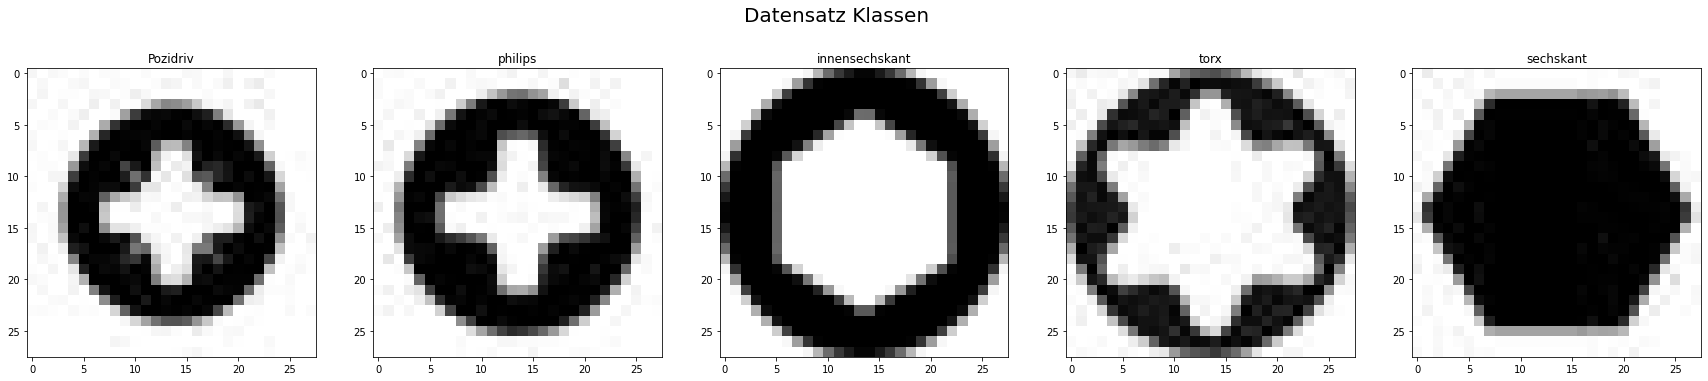

In [4]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 5, 1)
plt.title('Pozidriv')
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('philips')
plt.imshow(philips, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('innensechskant')
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('torx')
plt.imshow(torx, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('sechskant')
plt.imshow(sechskant, cmap='gray')

plt.suptitle('Datensatz Klassen', fontsize=20)
#plt.subplots_adjust(left=0.2, wspace=0.4, top=0.8)
plt.show()

Der Datensatz dient zum Trainieren und Testen der künstlichen neuronalen Netze. Es gibt verschiedene Wege einen Datensatz von Schraubenbildern zu erzeugen:
 - virtuelle 3D Objekte mit Hilfe von CAD darstellen und daraus Bilder mit unterschiedlichen Ausrichtungen erzeugen
 - Schraubenbilder aus Herstellerkatalogen oder dem Internet extrahieren
 - Eigene Bilder mit einer Kamera anfertigen

In dieser Arbeit werden die letzteren beiden Varianten vorgestellt. Zunächst wird gezeigt, wie aus wenigen externen Bidern ein Datensatz künstlich erzeugt werden kann. Dieser künstlich erzeugte Daten besteht aus sehr wenigen Ursprungsbildern, die künstlich transformiert werden um somit weitere Bilder zu generieren. Die Transformation wird im Abschnitt "Datensatz aus wenigen Bildern" noch näher beschrieben.

## Datensatz aus wenigen Bildern

Dieser Erste Datensatz dient dazu, zu zeigen wie vorhandene Bilder künstlich leichten Veränderungen unterzogen werden können um somit dem Netz einen umfangreicheren Trainingssatz bereit zu stellen. Desweiteren werden in diesem künstlichen Datensatz lediglich verschiedene Schraubenkopfformen mit gleicher Ausrichtung verwendet. Die Folge ist ein Datensatz, der einfach genug ist um Regressionsmodelle zu Einstieg zu verwenden.

Als Einführung in das Thema Bilderkennung mit CNN's, wird eine einfache Bilderkennung mit Hilfe der Logistischen Regression erstellt. Die Log. Regr. ist sehr viel weniger leistungsfähig als ein CNN, aus diesem Grund wird ein einfacher Datensatz aus Symbol-Bildern von 5 Schraubenarten erstellt.

Aus diesen Bildern wird nun ein Datensatz erzeugt. Die Bilder werden mit Hilfe des "Image Data Generators" transformiert, d.h durch Rotation, Zoom, Verschiebung werden neue Varianten der Bilder generiert.

## Bilder Array manuell

Die folgende Ordnerstruktur liegt vor:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

In [5]:
DATADIR = '0_Schraubenkopfbilder_28x28'
CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']

In [6]:
# training_data anlegen
image_dataset = []

# Bildgröße
IMG_SIZE=28

# Bilder und Kategorien in ein ... speichern:

def create_image_dataset():
    for category in CATEGORIES:  # jede Klasse

        path = os.path.join(DATADIR,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification ( 0= 1=

        for img in tqdm(os.listdir(path)):  # iterate over each image per Category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                image_dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_image_dataset()

print(len(image_dataset))

NameError: name 'os' is not defined

In [ ]:
nrow = len(training_data)
ncol = len(training_data[0])
print('Reihen :', nrow)
print('Spalten :', ncol)

In [ ]:
for sample in training_data[:50]:
    print(sample[1])

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
from matplotlib import pyplot

for i in range(5):
# define subplot
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X[i],cmap='gray')

pyplot.show()

In [ ]:
X.reshape(-1, IMG_SIZE, IMG_SIZE).shape

## Image Data Generator konfigurieren

In [ ]:
#import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

#Generator konfigurieren:
gen = ImageDataGenerator (
    width_shift_range=2,
    height_shift_range=2,
    rotation_range=10,
    #shear_range=0.01,
    zoom_range=0.1,
    fill_mode='constant',cval=255 # bester fill mode bei einfarbigen Hintergrund
)
# Ein Bild generieren:
for batch in gen.flow(
    X,
    shuffle=True,
):
    #print(batch.shape)
    plt.imshow(batch[0],cmap='gray',vmin=0,vmax=255)
    plt.show
    break
    
print(batch.shape)
for i in range(5):
# define subplot
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(batch[i],cmap='gray')

pyplot.show()

## Hier wird der echte Datensatz (mit vielen Bildern) erzeugt

In [ ]:
image_data_dir = '0_Schraubenkopfbilder_28x28/a'


train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=2.0,
    height_shift_range=2.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1. / 255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

itr = train_datagen.flow_from_directory(
    image_data_dir,
    target_size=(28, 28),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=5,
    shuffle=True,
    seed=None,
    save_to_dir='dataset_28x28',
    #save_prefix="",
    save_format="jpg",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
    
    
#target_size=(img_width, img_height),
#batch_size=10,
#class_mode='categorical')

i=0

for i in range(0,20):
    X, y = itr.next()

Es wurden von jeder Klasse i samples erzeugt.

In [ ]:
filelist = glob.glob('dataset_28x28/*.png')
X = np.array([np.array(Image.open(fname)) for fname in filelist])
print(X.shape)
print(len(filelist))

In [ ]:
categories = []
rand_strs = []
nullen =[]

Die Bilder wurden in das Array **X** geschrieben.

## Labels aus Dateinamen

Nun liegen alle generierten Bilder in einem Ordner. Jetzt werden die Klassen über die Dateinamen abgefangen und in der gleichen Reihenfolge in der Liste "categories" abgelegt.

In [ ]:
import os

data_path = "dataset_28x28"
for img_filename in os.listdir(data_path):
    if img_filename.startswith("_0"):
        null, category, rand_str, = img_filename.split('_')
        nullen.append(null)
        categories.append(category)
        rand_strs.append(rand_str)
        
for img_filename in os.listdir(data_path):
    if img_filename.startswith("_1"):
        null, category, rand_str, = img_filename.split('_')
        nullen.append(null)
        categories.append(category)
        rand_strs.append(rand_str)

for img_filename in os.listdir(data_path):
    if img_filename.startswith("_2"):
        null, category, rand_str, = img_filename.split('_')
        nullen.append(null)
        categories.append(category)
        rand_strs.append(rand_str)       
        

for img_filename in os.listdir(data_path):
    if img_filename.startswith("_3"):
        null, category, rand_str, = img_filename.split('_')
        nullen.append(null)
        categories.append(category)
        rand_strs.append(rand_str)
        
for img_filename in os.listdir(data_path):
    if img_filename.startswith("_4"):
        null, category, rand_str, = img_filename.split('_')
        nullen.append(null)
        categories.append(category)
        rand_strs.append(rand_str)   

In [ ]:
print(img_filename)
print(categories)
len(categories)

In [ ]:
y=categories

## Datensatz aufteilen

Die Bilder **X** und die entsprechenden Labels **y** werden nun noch aufgeteilt.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

In [ ]:
X_train[0]

## Datensatz untersuchen

Wie sieht der Datensatz aus? wurden die Bilder gemischt oder sind sie immer noch nach Klassen sortiert?

In [ ]:
i=65
print(y_test[i])
plt.imshow(X_test[i],cmap='gray',vmin=0,vmax=255)
plt.show

In [ ]:
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('X_train.npy', X_train)
save('y_train.npy', y_train)
save('X_test.npy', X_test)
save('y_test.npy', y_test)

## Samples von einzelnem Bild

In [ ]:
# example of horizontal shift image augmentation
# from: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot
# load the image
img = load_img('0_Schraubenkopfbilder_28x28/pozidriv/pozidriv 28x28_gray.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

In [ ]:
# prepare iterator
it = gen.flow(samples, batch_size=1)

# generate samples and plot

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
    
    
# show the figure
pyplot.show()

## IDG

In [ ]:
train_data_dir = 'dataset_28x28/train'
validation_data_dir = 'dataset_28x28/validation'

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=None,
    shear_range=0,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.3,
    dtype=None,
)




itr = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=10,
    shuffle=False,
    seed=None,
    save_to_dir='dataset_28x28',
    #save_prefix="",
    save_format="jpg",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
    
    
#target_size=(img_width, img_height),
#batch_size=10,
#class_mode='categorical')

i=0

for i in range(0,3):
    X, y = itr.next()
    

In [ ]:
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('Dataset_vid/X_train.npy', X_train)
save('Dataset_vid/y_train.npy', y_train)
save('Dataset_vid/X_test.npy', X_test)
save('Dataset_vid/y_test.npy', y_test)

## Datensatz mit Keras erzeugen und erweitern

Mit dem ImageDataGenerator aus dem Keras Paket *Image data preprocessing*, kann ein Datensatz erstellt werden.
Der Image Data Generator bietet eine Reihe nützlicher Funktionen um einen Datensatz aus Bildern zu erstellen und zu erweitern.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = tf.keras.preprocessing.image_dataset_from_directory(
    '0_Schraubenkopfbilder_28x28',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

In [ ]:
class_names = X.class_names
print(class_names)

## Image Data Generator

In [ ]:
# ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

In [ ]:
import session_info  
session_info.show()